# **Install MMDetection and Related Libraries**

In [1]:
!nvcc -V
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!pip install -U torch==1.7.1+cu110 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 1156.8 MB 7.2 kB/s 
     |████████████████████████████████| 12.8 MB 56.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.7.0
    Uninstalling torch-1.7.0:
      Successfully uninstalled torch-1.7.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.1
    Uninstalling torchvision-0.8.1:
      Successfully uninstalled torchvision-0.8.1
     |████████████████████████████████| 313 kB 1.1 MB/s 
     |████████████████████████████████| 185 kB 5.1 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.9-cp37-cp37m-linux_x86_64.whl size=25976771 sha256=9a0790b497f358f53d522b6b6674092476c72a805835fee362fdd1cfaf6c6bb6
  Stored in directory: /root/.cache/pip/wheels/2f/4b/7a/180870186c89ce617e1935c9ac9e4d13e643782327434b7349
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 19329, done.


In [3]:
import torch, torchvision

print(torch.__version__, torch.cuda.is_available())

import mmdet

print(mmdet.__version__)

from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print(get_compiling_cuda_version())
print(get_compiler_version())

1.7.1+cu110 True
2.14.0
11.0
GCC 7.5


In [4]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

--2021-07-14 16:12:19--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  7.73MB/s    in 20s     

2021-07-14 16:12:41 (8.63 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



# **Test MMDetection**

In [5]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = "configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py"
# Setup a checkpoint file to load
checkpoint = "checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth"
# initialize the detector
model = init_detector(config, checkpoint, device="cuda:0")

/kaggle/working/mmdetection/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [6]:
img = "./demo/demo.jpg"
result = inference_detector(model, img)

/kaggle/working/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/kaggle/working/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/kaggle/working/mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


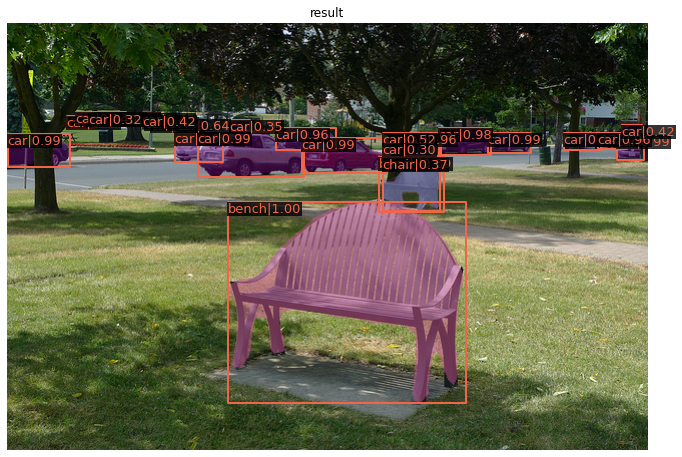

In [7]:
show_result_pyplot(model, img, result, score_thr=0.3)

In [8]:
%cd ..

/kaggle/working


# **Convert Txt Files to Xml**

In [9]:
import os
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import glob
import cv2
import shutil
import random
import os.path as osp
import json
import mmcv
import re
import xml.etree.ElementTree as ET
from typing import Dict, List

In [10]:
# Stolen from https://www.kaggle.com/sid4sal/converting-txt-labels-to-xml-labels
def convert_txt(source):

    for txt_file in glob.glob(source + "/*.txt"):

        f = open(txt_file)
        f_str = f.read()
        f.close()

        lst = list(map(int, f_str.split()))
        n = lst[0]

        fx = open(txt_file.replace(".txt", ".xml"), "x")

        fx.write("<annotation>\n")

        fx.write(
            "  <filename>{}.jpeg</filename>\n".format(
                txt_file.replace(source, "")
                .replace(".txt", "")
                .replace("/", "")
                .replace("\\", "")
            )
        )
        im = cv2.imread(txt_file.replace(".txt", ".jpeg"))
        h, w, c = im.shape
        fx.write("  <size>\n")
        fx.write("      <width>{}</width>\n".format(w))
        fx.write("      <height>{}</height>\n".format(h))
        fx.write("      <depth>{}</depth>\n".format(c))
        fx.write("  </size>\n")

        fx.write("  <segmented>0</segmented>\n")

        for i in range(n):
            xmin = lst[(i * 4) + 1]
            ymin = lst[(i * 4) + 2]
            xmax = lst[(i * 4) + 3]
            ymax = lst[(i * 4) + 4]
            fx.write("  <object>\n")
            fx.write("      <name>Gun</name>\n")
            fx.write("      <bndbox>\n")
            fx.write("          <xmin>{}</xmin>\n".format(xmin))
            fx.write("          <ymin>{}</ymin>\n".format(ymin))
            fx.write("          <xmax>{}</xmax>\n".format(xmax))
            fx.write("          <ymax>{}</ymax>\n".format(ymax))
            fx.write("      </bndbox>\n")
            fx.write("  </object>\n")
        fx.write("</annotation>")
        fx.close()

In [11]:
!mkdir /kaggle/working/xml-labels

In [12]:
!cp -a ../input/guns-object-detection/Images/. /kaggle/working/xml-labels
!cp -a ../input/guns-object-detection/Labels/. /kaggle/working/xml-labels
convert_txt("/kaggle/working/xml-labels")

In [13]:
for file in os.listdir("/kaggle/working/xml-labels"):
    if file[-3:] == "txt":
        os.remove("/kaggle/working/xml-labels/" + file)

In [14]:
!mkdir images

In [15]:
for file in os.listdir("/kaggle/working/xml-labels"):
    if file[-4:] == "jpeg":
        shutil.move("/kaggle/working/xml-labels/" + file, "/kaggle/working/images")

In [16]:
!mkdir val-xml-labels
!mkdir val-images

In [17]:
val_ids = random.sample(range(1, 333), 30)

In [18]:
for ids in val_ids:
    shutil.move(
        "/kaggle/working/xml-labels/" + str(ids) + ".xml",
        "/kaggle/working/val-xml-labels",
    )
    shutil.move(
        "/kaggle/working/images/" + str(ids) + ".jpeg", "/kaggle/working/val-images"
    )

# **Convert from VOC to COCO annotation format**

In [19]:
%%writefile labels.txt
Gun

Writing labels.txt


In [20]:
len(os.listdir("xml-labels"))

303

In [21]:
f = open("train.txt", "x")
f.close()
lines = []
for file in os.listdir("/kaggle/working/xml-labels"):
    lines.append("/kaggle/working/xml-labels/" + file)
with open("train.txt", "w") as f:
    for line in lines:
        f.write(line)
        f.write("\n")
f.close()

In [22]:
f = open("val.txt", "x")
f.close()
lines = []
for file in os.listdir("/kaggle/working/val-xml-labels"):
    lines.append("/kaggle/working/val-xml-labels/" + file)
with open("val.txt", "w") as f:
    for line in lines:
        f.write(line)
        f.write("\n")
f.close()

In [23]:
# Stolen from https://github.com/yukkyo/voc2coco
def get_label2id(labels_path: str) -> Dict[str, int]:
    with open(labels_path, "r") as f:
        labels_str = f.read().split()
    labels_ids = list(range(1, len(labels_str) + 1))
    return dict(zip(labels_str, labels_ids))


def get_annpaths(
    ann_dir_path: str = None,
    ann_ids_path: str = None,
    ext: str = "",
    annpaths_list_path: str = None,
) -> List[str]:
    # If use annotation paths list
    if annpaths_list_path is not None:
        with open(annpaths_list_path, "r") as f:
            ann_paths = f.read().split()
        return ann_paths

    # If use annotaion ids list
    ext_with_dot = "." + ext if ext != "" else ""
    with open(ann_ids_path, "r") as f:
        ann_ids = f.read().split()
    ann_paths = [os.path.join(ann_dir_path, aid + ext_with_dot) for aid in ann_ids]
    return ann_paths


def get_image_info(annotation_root, extract_num_from_imgid=True):
    path = annotation_root.findtext("path")
    if path is None:
        filename = annotation_root.findtext("filename")
    else:
        filename = os.path.basename(path)
    img_name = os.path.basename(filename)
    img_id = os.path.splitext(img_name)[0]
    if extract_num_from_imgid and isinstance(img_id, str):
        img_id = int(re.findall(r"\d+", img_id)[0])

    size = annotation_root.find("size")
    width = int(size.findtext("width"))
    height = int(size.findtext("height"))

    image_info = {
        "id": img_id,
        "width": width,
        "height": height,
        "file_name": filename,
    }
    return image_info


def get_coco_annotation_from_obj(obj, label2id):
    label = obj.findtext("name")
    #     assert label in label2id, f"Error: {label} is not in label2id !"
    category_id = label2id[label]
    bndbox = obj.find("bndbox")
    xmin = int(float(bndbox.findtext("xmin"))) - 1
    ymin = int(float(bndbox.findtext("ymin"))) - 1
    xmax = int(float(bndbox.findtext("xmax")))
    ymax = int(float(bndbox.findtext("ymax")))
    assert (
        xmax > xmin and ymax > ymin
    ), f"Box size error !: (xmin, ymin, xmax, ymax): {xmin, ymin, xmax, ymax}"
    o_width = xmax - xmin
    o_height = ymax - ymin
    ann = {
        "category_id": category_id,
        "segmentation": [],  # This script is not for segmentation
        "area": o_width * o_height,
        "bbox": [xmin, ymin, o_width, o_height],
        "iscrowd": 0,
    }
    return ann


def convert_xmls_to_cocojson(
    annotation_paths: List[str],
    label2id: Dict[str, int],
    output_jsonpath: str,
    extract_num_from_imgid: bool = True,
):
    output_json_dict = {"images": [], "annotations": [], "categories": []}
    bnd_id = 1  # START_BOUNDING_BOX_ID, TODO input as args ?
    print("Start converting !")
    for a_path in annotation_paths:
        # Read annotation xml
        ann_tree = ET.parse(a_path)
        ann_root = ann_tree.getroot()

        img_info = get_image_info(
            annotation_root=ann_root, extract_num_from_imgid=extract_num_from_imgid
        )
        img_id = img_info["id"]
        output_json_dict["images"].append(img_info)

        for obj in ann_root.findall("object"):
            ann = get_coco_annotation_from_obj(obj=obj, label2id=label2id)
            annot = {
                "id": bnd_id,
                "image_id": img_id,
            }
            annot.update(ann)
            output_json_dict["annotations"].append(annot)
            bnd_id = bnd_id + 1

    for label, label_id in label2id.items():
        category_info = {"id": label_id, "name": label, "supercategory": "none"}
        output_json_dict["categories"].append(category_info)

    with open(output_jsonpath, "w") as f:
        output_json = json.dumps(output_json_dict)
        f.write(output_json)

In [24]:
def convert_to_coco(
    ann_path_list="/kaggle/working/train.txt",
    labels="/kaggle/working/labels.txt",
    output="/kaggle/working/output.json",
):
    label2id = get_label2id(labels_path=labels)
    ann_paths = get_annpaths(annpaths_list_path=ann_path_list)
    convert_xmls_to_cocojson(
        annotation_paths=ann_paths, label2id=label2id, output_jsonpath=output
    )

In [25]:
convert_to_coco()

Start converting !


In [26]:
convert_to_coco(
    ann_path_list="/kaggle/working/val.txt",
    labels="/kaggle/working/labels.txt",
    output="/kaggle/working/val_output.json",
)

Start converting !


# **Downloading RetinaNet Checkpoint**

In [27]:
os.listdir("./mmdetection/checkpoints")

['mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth']

In [28]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/retinanet_r101_fpn_1x_coco/retinanet_r101_fpn_1x_coco_20200130-7a93545f.pth \
      -O /kaggle/working/mmdetection/checkpoints/retinanet_r101_fpn_1x_coco_20200130-7a93545f.pth

--2021-07-14 16:13:26--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/retinanet_r101_fpn_1x_coco/retinanet_r101_fpn_1x_coco_20200130-7a93545f.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2021-07-14 16:13:27 ERROR 403: Forbidden.



# **Config File**

In [29]:
from mmcv import Config

cfg = Config.fromfile(
    "/kaggle/working/mmdetection/configs/retinanet/retinanet_r101_fpn_1x_coco.py"
)

In [30]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = "CocoDataset"
cfg.classes = "/kaggle/working/labels.txt"
cfg.data_root = "/kaggle/working"
cfg.model.bbox_head.num_classes = 1
cfg.data.test.type = "CocoDataset"
cfg.data.test.classes = "labels.txt"
cfg.data.test.data_root = "/kaggle/working"
cfg.data.test.ann_file = "val_output.json"
cfg.data.test.img_prefix = "val-images"

cfg.data.train.type = "CocoDataset"
cfg.data.train.data_root = "/kaggle/working"
cfg.data.train.ann_file = "output.json"
cfg.data.train.img_prefix = "images"
cfg.data.train.classes = "labels.txt"

cfg.data.val.type = "CocoDataset"
cfg.data.val.data_root = "/kaggle/working"
cfg.data.val.ann_file = "val_output.json"
cfg.data.val.img_prefix = "val-images"
cfg.data.val.classes = "labels.txt"

# modify num classes of the model in box head
# cfg.model.roi_head.bbox_head.num_classes = 1
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = (
    "../input/retinanet/retinanet_r101_fpn_1x_coco_20200130-7a93545f (1).pth"
)

# Set up working dir to save files and logs.
cfg.work_dir = "./"

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.01 / 8
cfg.optimizer_config.grad_clip = dict(max_norm=35, norm_type=2)
# cfg.lr_config.warmup = None
# cfg.lr_config.policy = 'cyclic'
# cfg.log_config.interval = 10
cfg.lr_config.policy = "step"
cfg.lr_config.step = 7
cfg.data.samples_per_gpu = 1
cfg.data.workers_per_gpu = 1
cfg.evaluation.metric = "bbox"
cfg.evaluation.interval = 4
cfg.checkpoint_config.interval = 12
cfg.runner.max_epochs = 24
cfg.log_config.interval = 100

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f"Config:\n{cfg.pretty_text}")

Config:
model = dict(
    type='RetinaNet',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        start_level=1,
        add_extra_convs='on_input',
        num_outs=5),
    bbox_head=dict(
        type='RetinaHead',
        num_classes=1,
        in_channels=256,
        stacked_convs=4,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            octave_base_scale=4,
            scales_per_octave=3,
            ratios=[0.5, 1.0, 2.0],
            strides=[8, 16, 32, 64, 128]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',


# **Train RetinaNet**

In [31]:
datasets = [build_dataset(cfg.data.train)]
model = build_detector(
    cfg.model, train_cfg=cfg.get("train_cfg"), test_cfg=cfg.get("test_cfg")
)
model.CLASSES = datasets[0].CLASSES

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2021-07-14 16:13:33,881 - mmdet - INFO - load checkpoint from ../input/retinanet/retinanet_r101_fpn_1x_coco_20200130-7a93545f (1).pth
2021-07-14 16:13:33,884 - mmdet - INFO - Use load_from_local loader


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2021-07-14 16:13:38,627 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([9, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([9]).
2021-07-14 16:13:38,635 - mmdet - INFO - Start running, host: root@5c1e54c69c34, work_dir: /kaggle/working
2021-07-14 16:13:38,636 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(NORMAL      )

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 30/30, 9.2 task/s, elapsed: 3s, ETA:     0s

2021-07-14 16:19:19,057 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-14 16:19:19,362 - mmdet - INFO - Epoch(val) [4][30]	bbox_mAP: 0.3630, bbox_mAP_50: 0.8470, bbox_mAP_75: 0.1700, bbox_mAP_s: 0.0910, bbox_mAP_m: 0.4090, bbox_mAP_l: 0.5670, bbox_mAP_copypaste: 0.363 0.847 0.170 0.091 0.409 0.567


DONE (t=0.23s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.363
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.847
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.091
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.409
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.567
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.489
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.489
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.489
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.333
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.514
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

2021-07-14 16:19:48,379 - mmdet - INFO - Epoch [5][100/303]	lr: 1.250e-03, eta: 0:27:26, time: 0.290, data_time: 0.025, memory: 2789, loss_cls: 0.1061, loss_bbox: 0.2222, loss: 0.3283, grad_norm: 7.7458
2021-07-14 16:20:15,217 - mmdet - INFO - Epoch [5][200/303]	lr: 1.250e-03, eta: 0:26:55, time: 0.268, data_time: 0.004, memory: 2789, loss_cls: 0.1305, loss_bbox: 0.2370, loss: 0.3675, grad_norm: 8.4350
2021-07-14 16:20:42,692 - mmdet - INFO - Epoch [5][300/303]	lr: 1.250e-03, eta: 0:26:27, time: 0.275, data_time: 0.004, memory: 2789, loss_cls: 0.1334, loss_bbox: 0.2576, loss: 0.3910, grad_norm: 8.2624
2021-07-14 16:21:12,815 - mmdet - INFO - Epoch [6][100/303]	lr: 1.250e-03, eta: 0:26:02, time: 0.293, data_time: 0.025, memory: 2789, loss_cls: 0.1110, loss_bbox: 0.2105, loss: 0.3215, grad_norm: 7.9074
2021-07-14 16:21:39,896 - mmdet - INFO - Epoch [6][200/303]	lr: 1.250e-03, eta: 0:25:33, time: 0.271, data_time: 0.004, memory: 2789, loss_cls: 0.0817, loss_bbox: 0.2128, loss: 0.2945, gra

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 30/30, 9.2 task/s, elapsed: 3s, ETA:     0s

2021-07-14 16:24:59,357 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...


2021-07-14 16:24:59,417 - mmdet - INFO - Epoch(val) [8][30]	bbox_mAP: 0.3690, bbox_mAP_50: 0.8220, bbox_mAP_75: 0.1940, bbox_mAP_s: 0.0500, bbox_mAP_m: 0.4270, bbox_mAP_l: 0.5450, bbox_mAP_copypaste: 0.369 0.822 0.194 0.050 0.427 0.545


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.822
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.194
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.427
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.545
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.442
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.442
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.442
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.510
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.567


2021-07-14 16:25:29,025 - mmdet - INFO - Epoch [9][100/303]	lr: 1.250e-04, eta: 0:21:49, time: 0.296, data_time: 0.025, memory: 2789, loss_cls: 0.0372, loss_bbox: 0.1447, loss: 0.1818, grad_norm: 4.9419
2021-07-14 16:25:55,828 - mmdet - INFO - Epoch [9][200/303]	lr: 1.250e-04, eta: 0:21:20, time: 0.268, data_time: 0.004, memory: 2789, loss_cls: 0.0389, loss_bbox: 0.1398, loss: 0.1787, grad_norm: 5.1090
2021-07-14 16:26:22,982 - mmdet - INFO - Epoch [9][300/303]	lr: 1.250e-04, eta: 0:20:51, time: 0.272, data_time: 0.005, memory: 2789, loss_cls: 0.0346, loss_bbox: 0.1384, loss: 0.1730, grad_norm: 4.9883
2021-07-14 16:26:53,026 - mmdet - INFO - Epoch [10][100/303]	lr: 1.250e-04, eta: 0:20:24, time: 0.290, data_time: 0.025, memory: 2789, loss_cls: 0.0365, loss_bbox: 0.1348, loss: 0.1713, grad_norm: 4.8404
2021-07-14 16:27:19,729 - mmdet - INFO - Epoch [10][200/303]	lr: 1.250e-04, eta: 0:19:55, time: 0.267, data_time: 0.004, memory: 2789, loss_cls: 0.0356, loss_bbox: 0.1296, loss: 0.1652, g

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 30/30, 8.9 task/s, elapsed: 3s, ETA:     0s

2021-07-14 16:30:41,730 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...


2021-07-14 16:30:41,783 - mmdet - INFO - Epoch(val) [12][30]	bbox_mAP: 0.3760, bbox_mAP_50: 0.8360, bbox_mAP_75: 0.2960, bbox_mAP_s: 0.0500, bbox_mAP_m: 0.4300, bbox_mAP_l: 0.5660, bbox_mAP_copypaste: 0.376 0.836 0.296 0.050 0.430 0.566


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.376
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.836
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.296
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.430
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.566
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.450
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.450
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.450
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.517
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.600


2021-07-14 16:31:10,717 - mmdet - INFO - Epoch [13][100/303]	lr: 1.250e-04, eta: 0:16:14, time: 0.289, data_time: 0.025, memory: 2789, loss_cls: 0.0294, loss_bbox: 0.1241, loss: 0.1535, grad_norm: 4.6329
2021-07-14 16:31:38,084 - mmdet - INFO - Epoch [13][200/303]	lr: 1.250e-04, eta: 0:15:46, time: 0.274, data_time: 0.005, memory: 2789, loss_cls: 0.0253, loss_bbox: 0.1194, loss: 0.1446, grad_norm: 4.6214
2021-07-14 16:32:05,692 - mmdet - INFO - Epoch [13][300/303]	lr: 1.250e-04, eta: 0:15:19, time: 0.276, data_time: 0.005, memory: 2789, loss_cls: 0.0233, loss_bbox: 0.1151, loss: 0.1385, grad_norm: 4.6275
2021-07-14 16:32:36,077 - mmdet - INFO - Epoch [14][100/303]	lr: 1.250e-04, eta: 0:14:51, time: 0.295, data_time: 0.026, memory: 2789, loss_cls: 0.0189, loss_bbox: 0.1080, loss: 0.1268, grad_norm: 4.3575
2021-07-14 16:33:03,025 - mmdet - INFO - Epoch [14][200/303]	lr: 1.250e-04, eta: 0:14:23, time: 0.269, data_time: 0.004, memory: 2789, loss_cls: 0.0211, loss_bbox: 0.1182, loss: 0.1394

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 30/30, 8.6 task/s, elapsed: 3s, ETA:     0s

2021-07-14 16:36:24,553 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-14 16:36:24,635 - mmdet - INFO - Epoch(val) [16][30]	bbox_mAP: 0.3860, bbox_mAP_50: 0.8530, bbox_mAP_75: 0.2300, bbox_mAP_s: 0.0900, bbox_mAP_m: 0.4320, bbox_mAP_l: 0.5780, bbox_mAP_copypaste: 0.386 0.853 0.230 0.090 0.432 0.578


DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.386
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.853
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.230
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.432
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.578
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.482
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.482
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.482
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.524
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

2021-07-14 16:36:53,731 - mmdet - INFO - Epoch [17][100/303]	lr: 1.250e-05, eta: 0:10:41, time: 0.291, data_time: 0.025, memory: 2789, loss_cls: 0.0188, loss_bbox: 0.0950, loss: 0.1138, grad_norm: 3.9706
2021-07-14 16:37:21,206 - mmdet - INFO - Epoch [17][200/303]	lr: 1.250e-05, eta: 0:10:13, time: 0.275, data_time: 0.005, memory: 2789, loss_cls: 0.0258, loss_bbox: 0.1114, loss: 0.1372, grad_norm: 4.5807
2021-07-14 16:37:47,985 - mmdet - INFO - Epoch [17][300/303]	lr: 1.250e-05, eta: 0:09:45, time: 0.268, data_time: 0.004, memory: 2789, loss_cls: 0.0204, loss_bbox: 0.1095, loss: 0.1299, grad_norm: 4.2089
2021-07-14 16:38:18,296 - mmdet - INFO - Epoch [18][100/303]	lr: 1.250e-05, eta: 0:09:17, time: 0.293, data_time: 0.025, memory: 2789, loss_cls: 0.0220, loss_bbox: 0.1113, loss: 0.1333, grad_norm: 4.3429
2021-07-14 16:38:45,419 - mmdet - INFO - Epoch [18][200/303]	lr: 1.250e-05, eta: 0:08:49, time: 0.271, data_time: 0.005, memory: 2789, loss_cls: 0.0184, loss_bbox: 0.1004, loss: 0.1188

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 30/30, 8.8 task/s, elapsed: 3s, ETA:     0s

2021-07-14 16:42:06,585 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2021-07-14 16:42:06,654 - mmdet - INFO - Epoch(val) [20][30]	bbox_mAP: 0.3770, bbox_mAP_50: 0.8450, bbox_mAP_75: 0.2250, bbox_mAP_s: 0.0590, bbox_mAP_m: 0.4290, bbox_mAP_l: 0.5780, bbox_mAP_copypaste: 0.377 0.845 0.225 0.059 0.429 0.578


DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.377
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.845
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.225
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.059
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.429
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.578
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.458
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.458
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.458
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.521
 Average Recall     (AR) @[ IoU=0.50:0.95 | a

2021-07-14 16:42:36,175 - mmdet - INFO - Epoch [21][100/303]	lr: 1.250e-05, eta: 0:05:06, time: 0.295, data_time: 0.026, memory: 2789, loss_cls: 0.0183, loss_bbox: 0.1045, loss: 0.1228, grad_norm: 4.2545
2021-07-14 16:43:02,964 - mmdet - INFO - Epoch [21][200/303]	lr: 1.250e-05, eta: 0:04:39, time: 0.268, data_time: 0.005, memory: 2789, loss_cls: 0.0240, loss_bbox: 0.1061, loss: 0.1301, grad_norm: 4.2680
2021-07-14 16:43:30,684 - mmdet - INFO - Epoch [21][300/303]	lr: 1.250e-05, eta: 0:04:11, time: 0.277, data_time: 0.005, memory: 2789, loss_cls: 0.0195, loss_bbox: 0.1037, loss: 0.1233, grad_norm: 4.0816
2021-07-14 16:44:01,302 - mmdet - INFO - Epoch [22][100/303]	lr: 1.250e-06, eta: 0:03:43, time: 0.298, data_time: 0.026, memory: 2789, loss_cls: 0.0222, loss_bbox: 0.1014, loss: 0.1236, grad_norm: 4.2322
2021-07-14 16:44:28,386 - mmdet - INFO - Epoch [22][200/303]	lr: 1.250e-06, eta: 0:03:15, time: 0.271, data_time: 0.004, memory: 2789, loss_cls: 0.0177, loss_bbox: 0.1021, loss: 0.1198

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 30/30, 8.9 task/s, elapsed: 3s, ETA:     0s

2021-07-14 16:47:50,137 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.373
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.830
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.424
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.578
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.453
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.453
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.453
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxD

2021-07-14 16:47:50,183 - mmdet - INFO - Epoch(val) [24][30]	bbox_mAP: 0.3730, bbox_mAP_50: 0.8300, bbox_mAP_75: 0.2260, bbox_mAP_s: 0.0500, bbox_mAP_m: 0.4240, bbox_mAP_l: 0.5780, bbox_mAP_copypaste: 0.373 0.830 0.226 0.050 0.424 0.578


# **Visualized Predictions with RetinaNet**

Use load_from_local loader


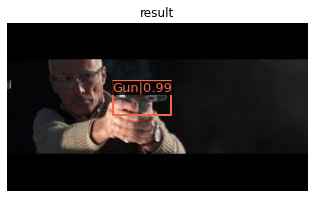

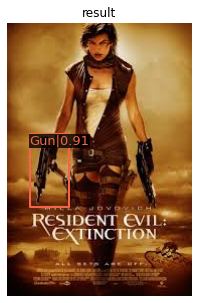

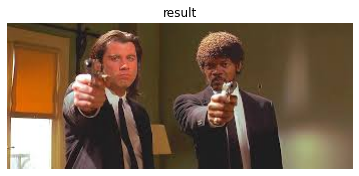

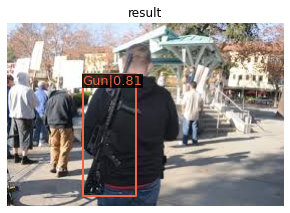

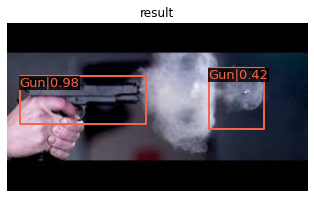

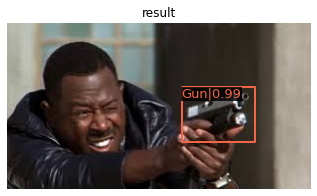

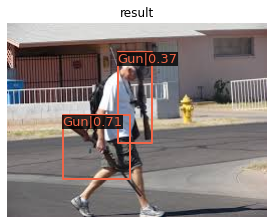

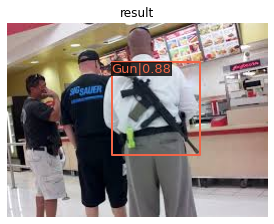

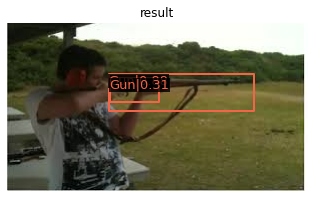

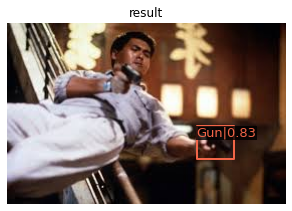

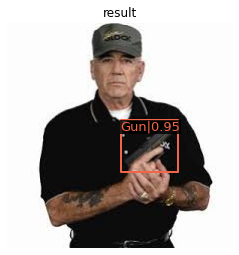

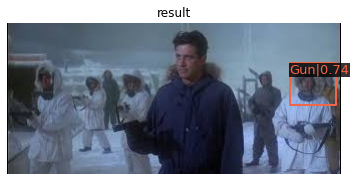

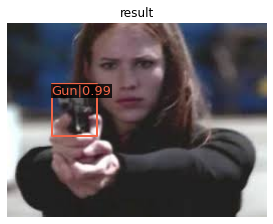

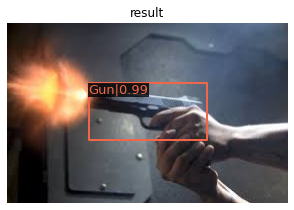

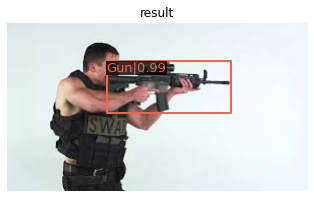

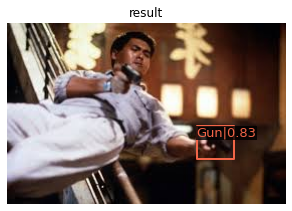

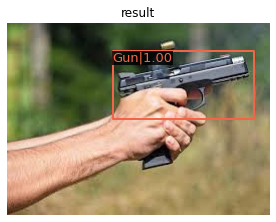

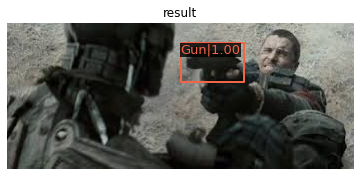

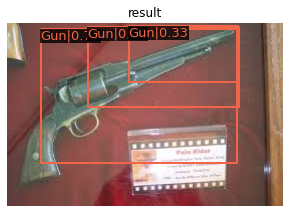

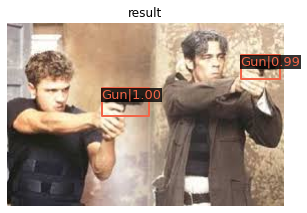

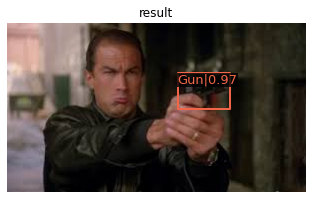

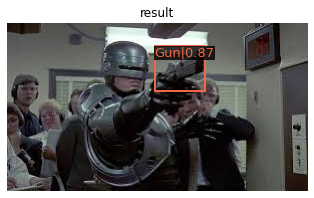

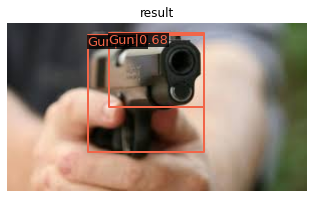

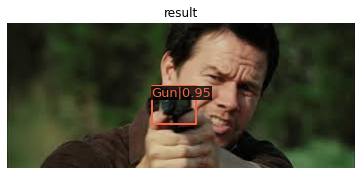

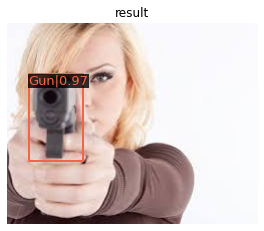

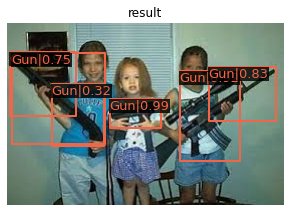

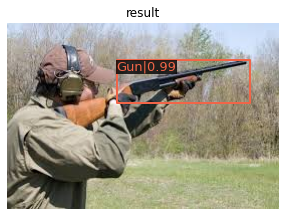

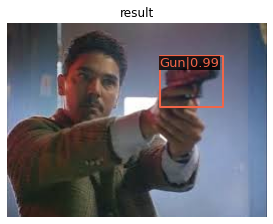

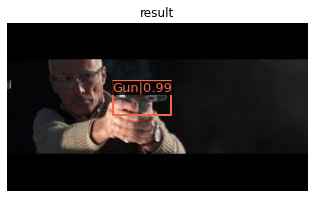

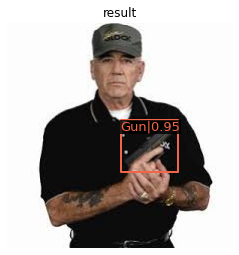

In [32]:
model = init_detector(cfg, "/kaggle/working/epoch_24.pth")
for i in range(len(val_ids)):
    img = mmcv.imread("/kaggle/working/val-images/" + str(val_ids[i]) + ".jpeg")
    result = inference_detector(model, img)
    show_result_pyplot(model, img, result)